In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
path = r"C:\Users\ahamr\Desktop\Machine Learning\Data Sets"

In [3]:
df_answer = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [4]:
df_answer.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_answer.shape

(22950, 16)

In [6]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [7]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [8]:
df.shape

(22950, 170)

In [9]:
#Delete columns that are absent in another data set
columns_to_delete = ['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 
                     'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 
                     'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 
                     'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 
                     'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max']

# Drop columns
df.drop(columns=columns_to_delete, inplace=True)

In [10]:
#Prepare data for algorithms 
df = df.drop(['DATE','MONTH'], axis=1)
df_answer= df_answer.drop(['DATE'], axis=1)

In [11]:
df.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [12]:
df_answer.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
#Create an 'X' matrix 
X = df
y = df_answer

In [14]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [15]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [17]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


In [18]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


In [19]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ahamr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

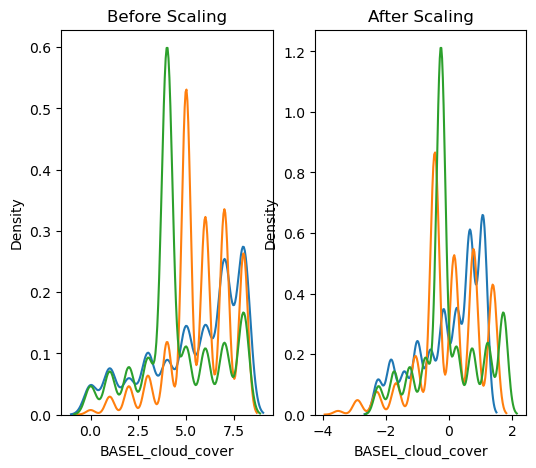

In [23]:
#Show scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

#Take random stations
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['BASEL_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['VALENTIA_cloud_cover'], ax=ax1)
sns.kdeplot(X_train['BUDAPEST_cloud_cover'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df['BASEL_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['VALENTIA_cloud_cover'], ax=ax2)
sns.kdeplot(X_train_df['BUDAPEST_cloud_cover'], ax=ax2)

plt.show()

In [24]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [25]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.41366488496397863
0.4130359010108052


C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


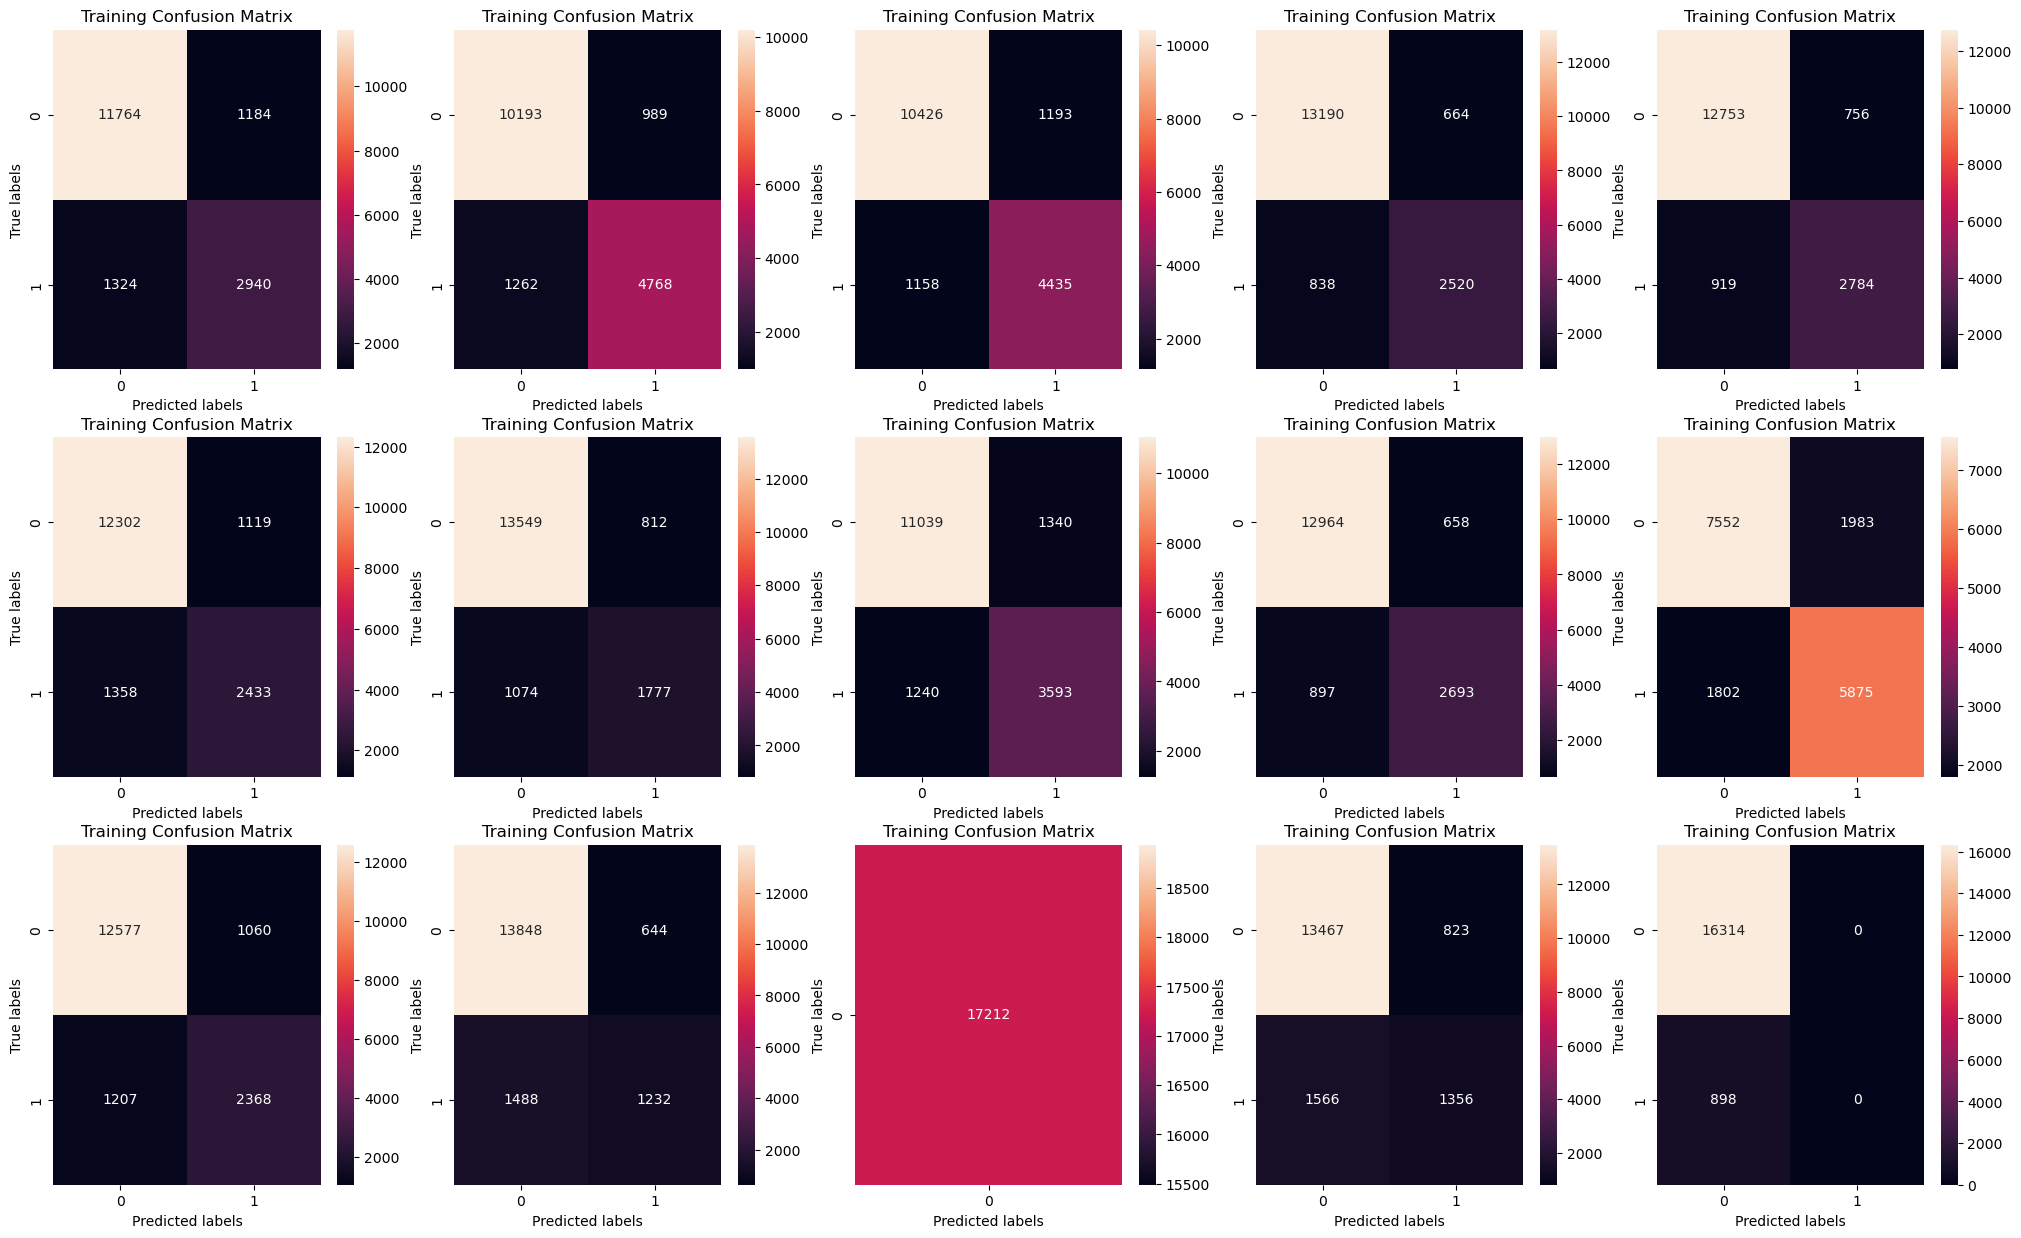

In [28]:
#Confusion matrix for training data 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title('Training Confusion Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


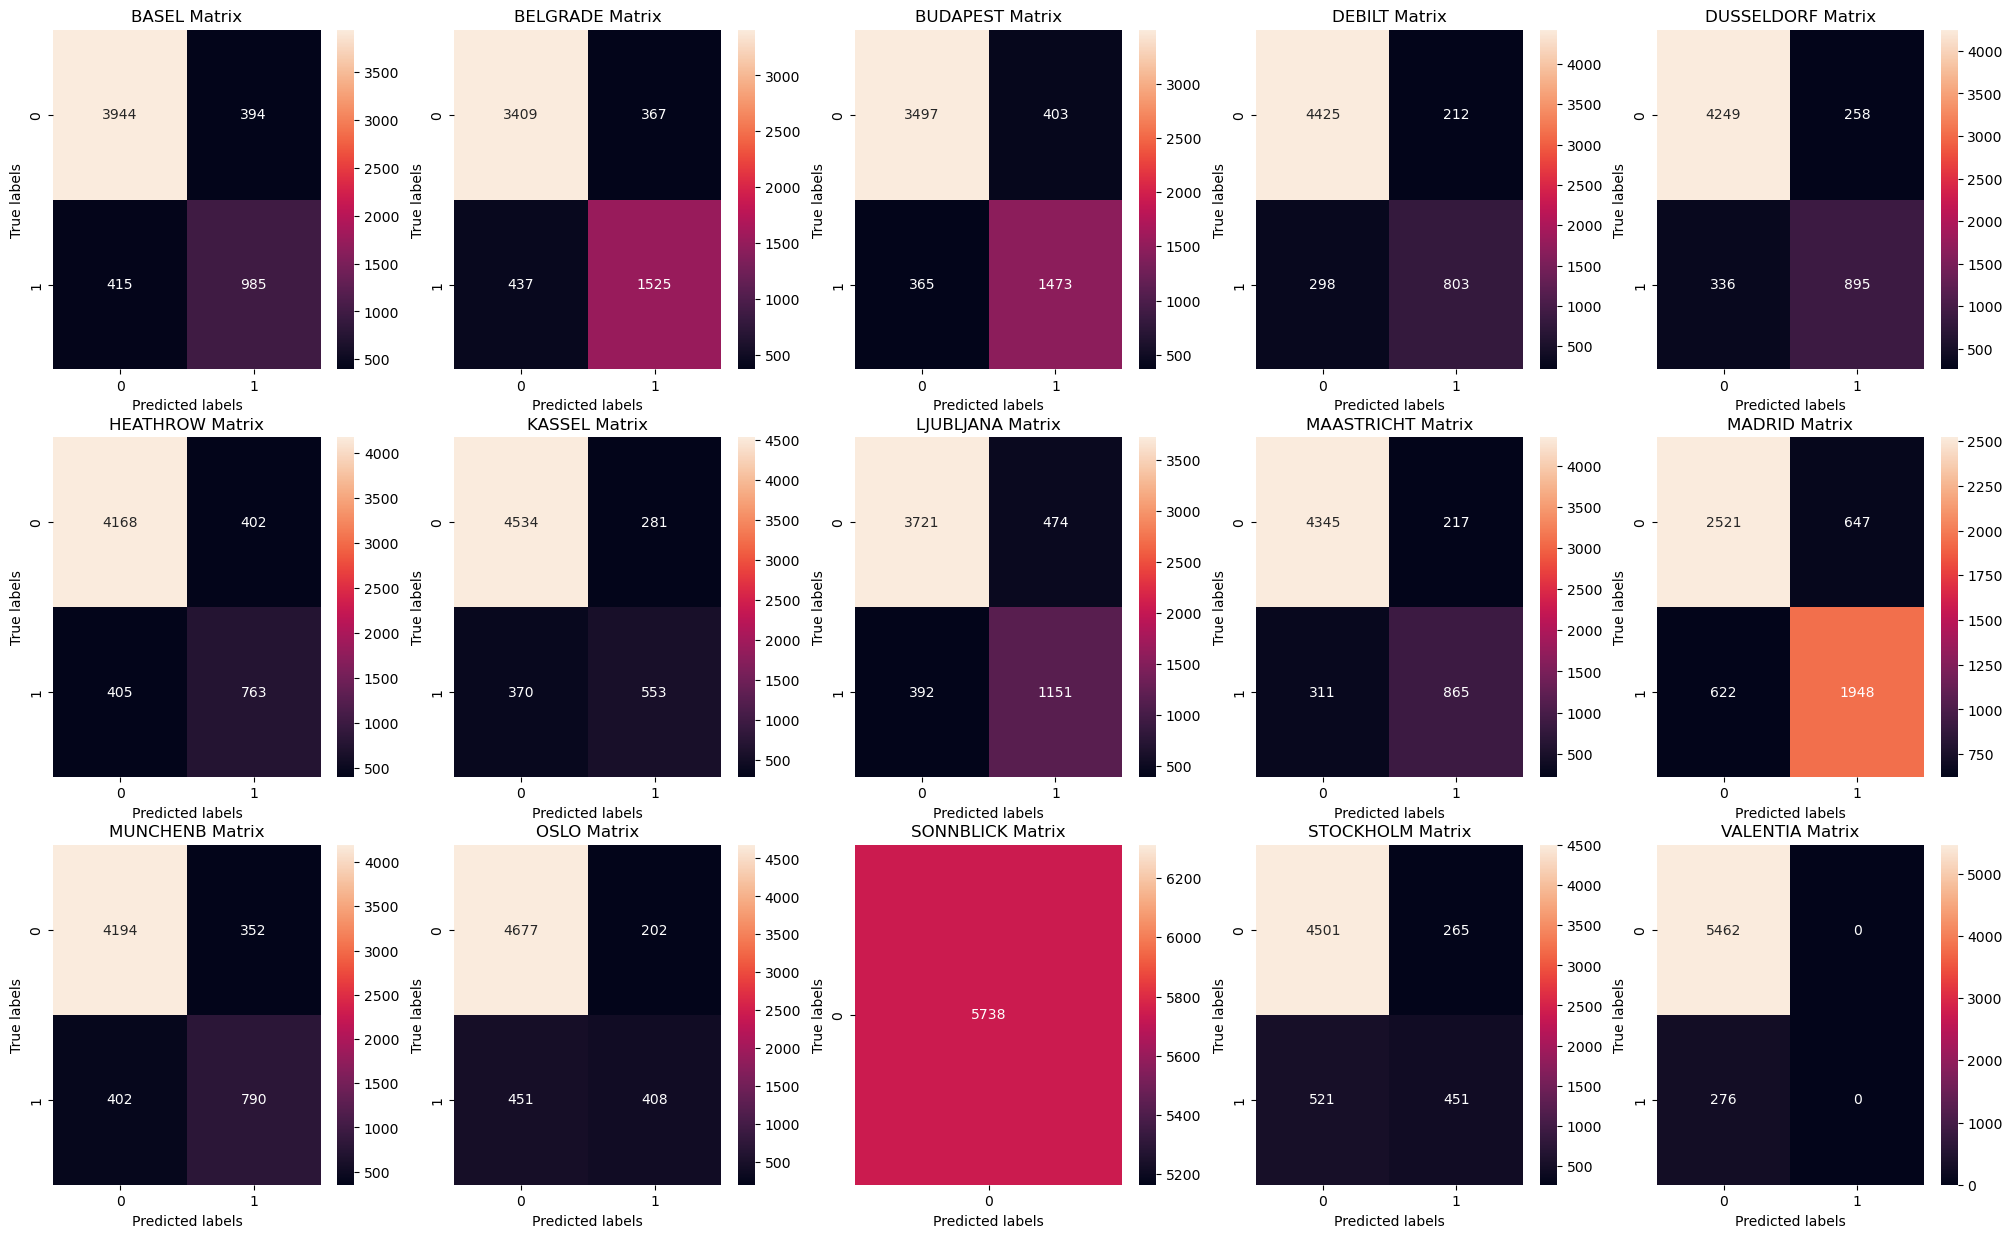

In [29]:
#Confusion matrix for testing data
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [108]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [109]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5323030443876365
0.5249215754618334


C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


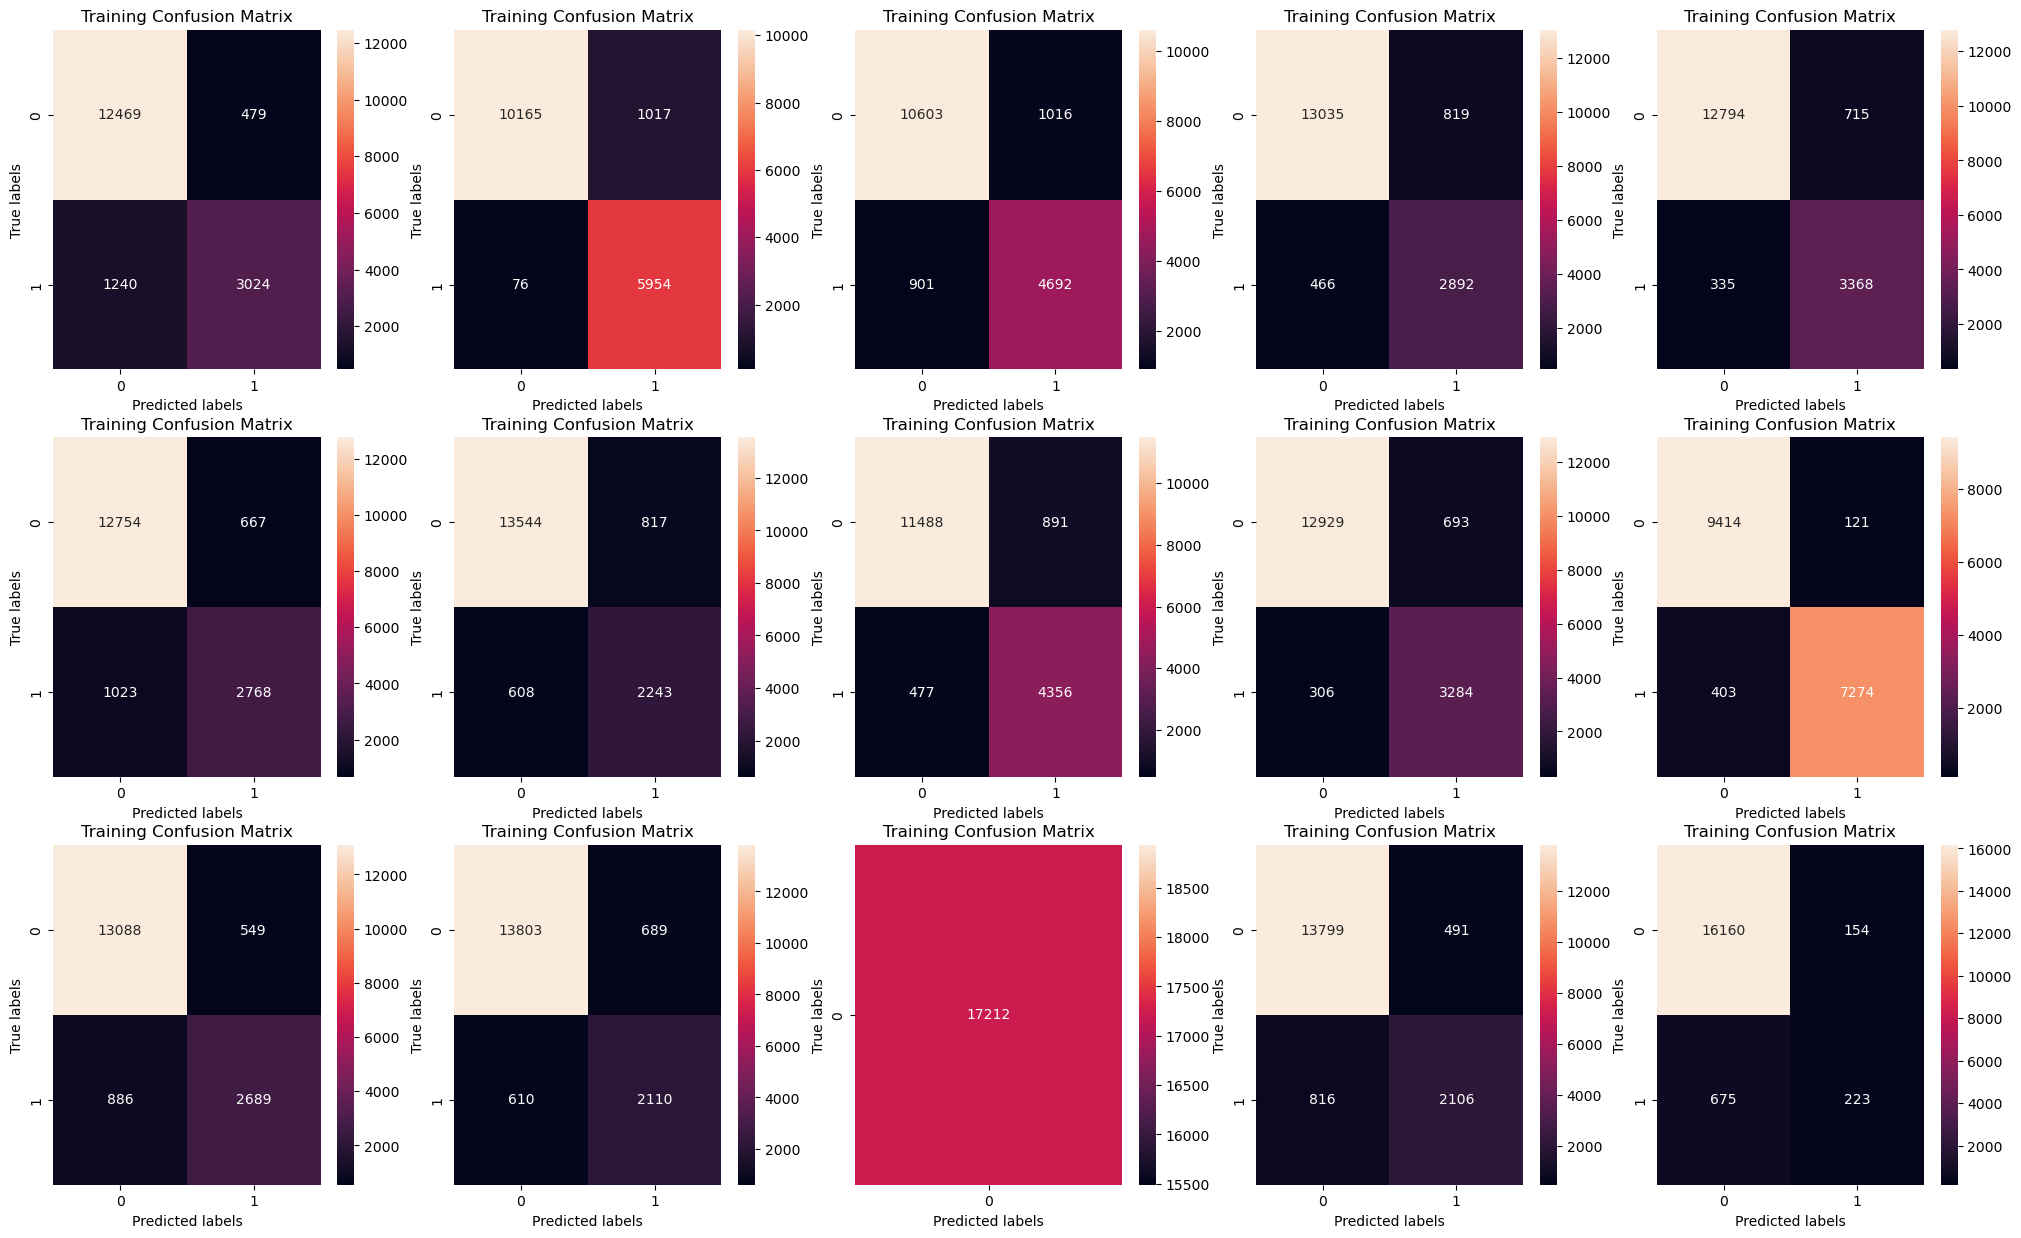

In [110]:
#Confusion matrix for training data 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
    
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title('Training Confusion Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


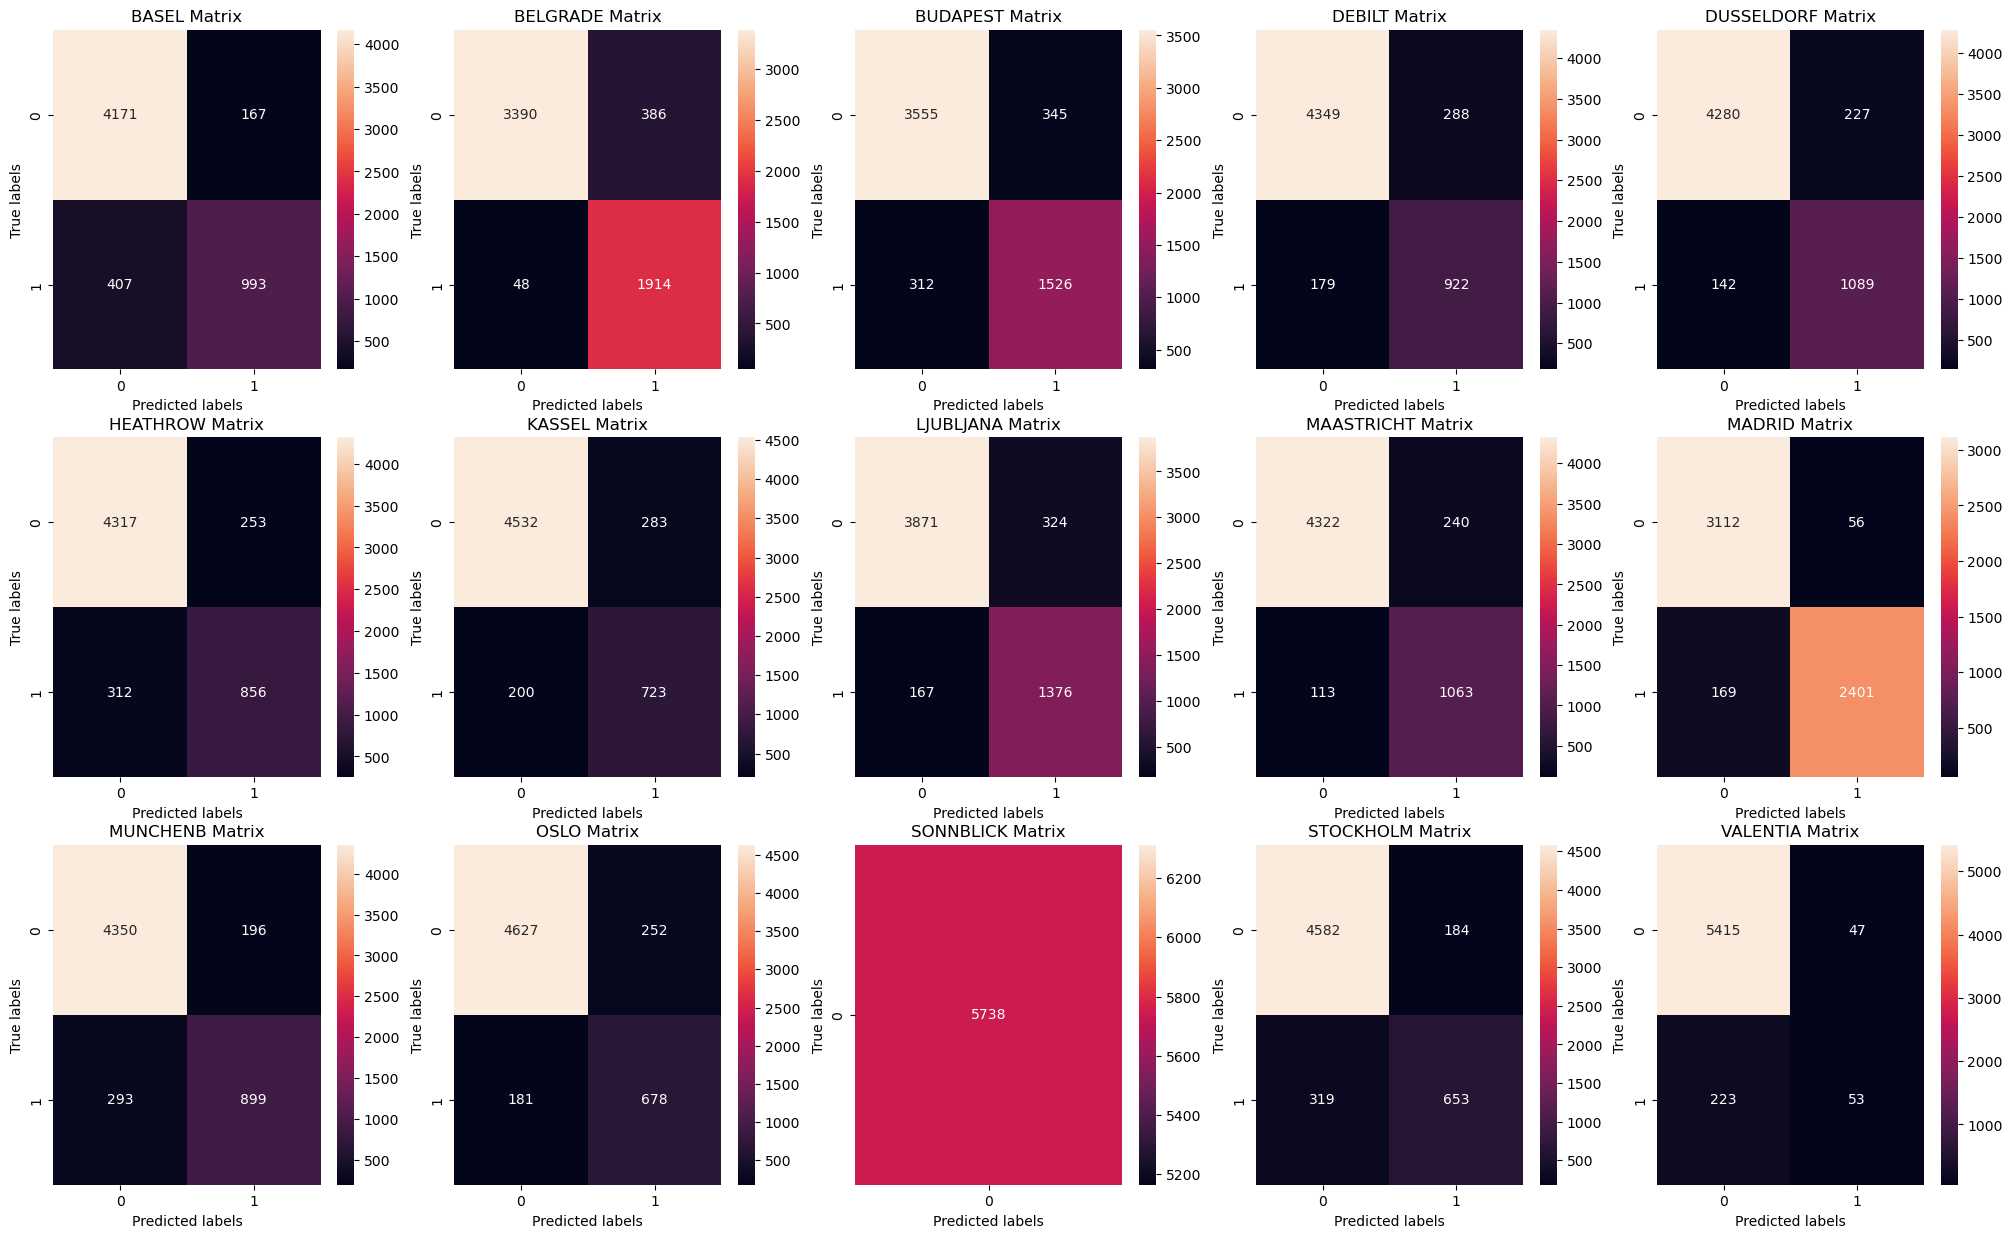

In [111]:
#Confusion matrix for testing data
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [152]:
#Create the ANN
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=1000, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25, 10), max_iter=1000)

In [153]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6327562165930746
0.5998605785988149


C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


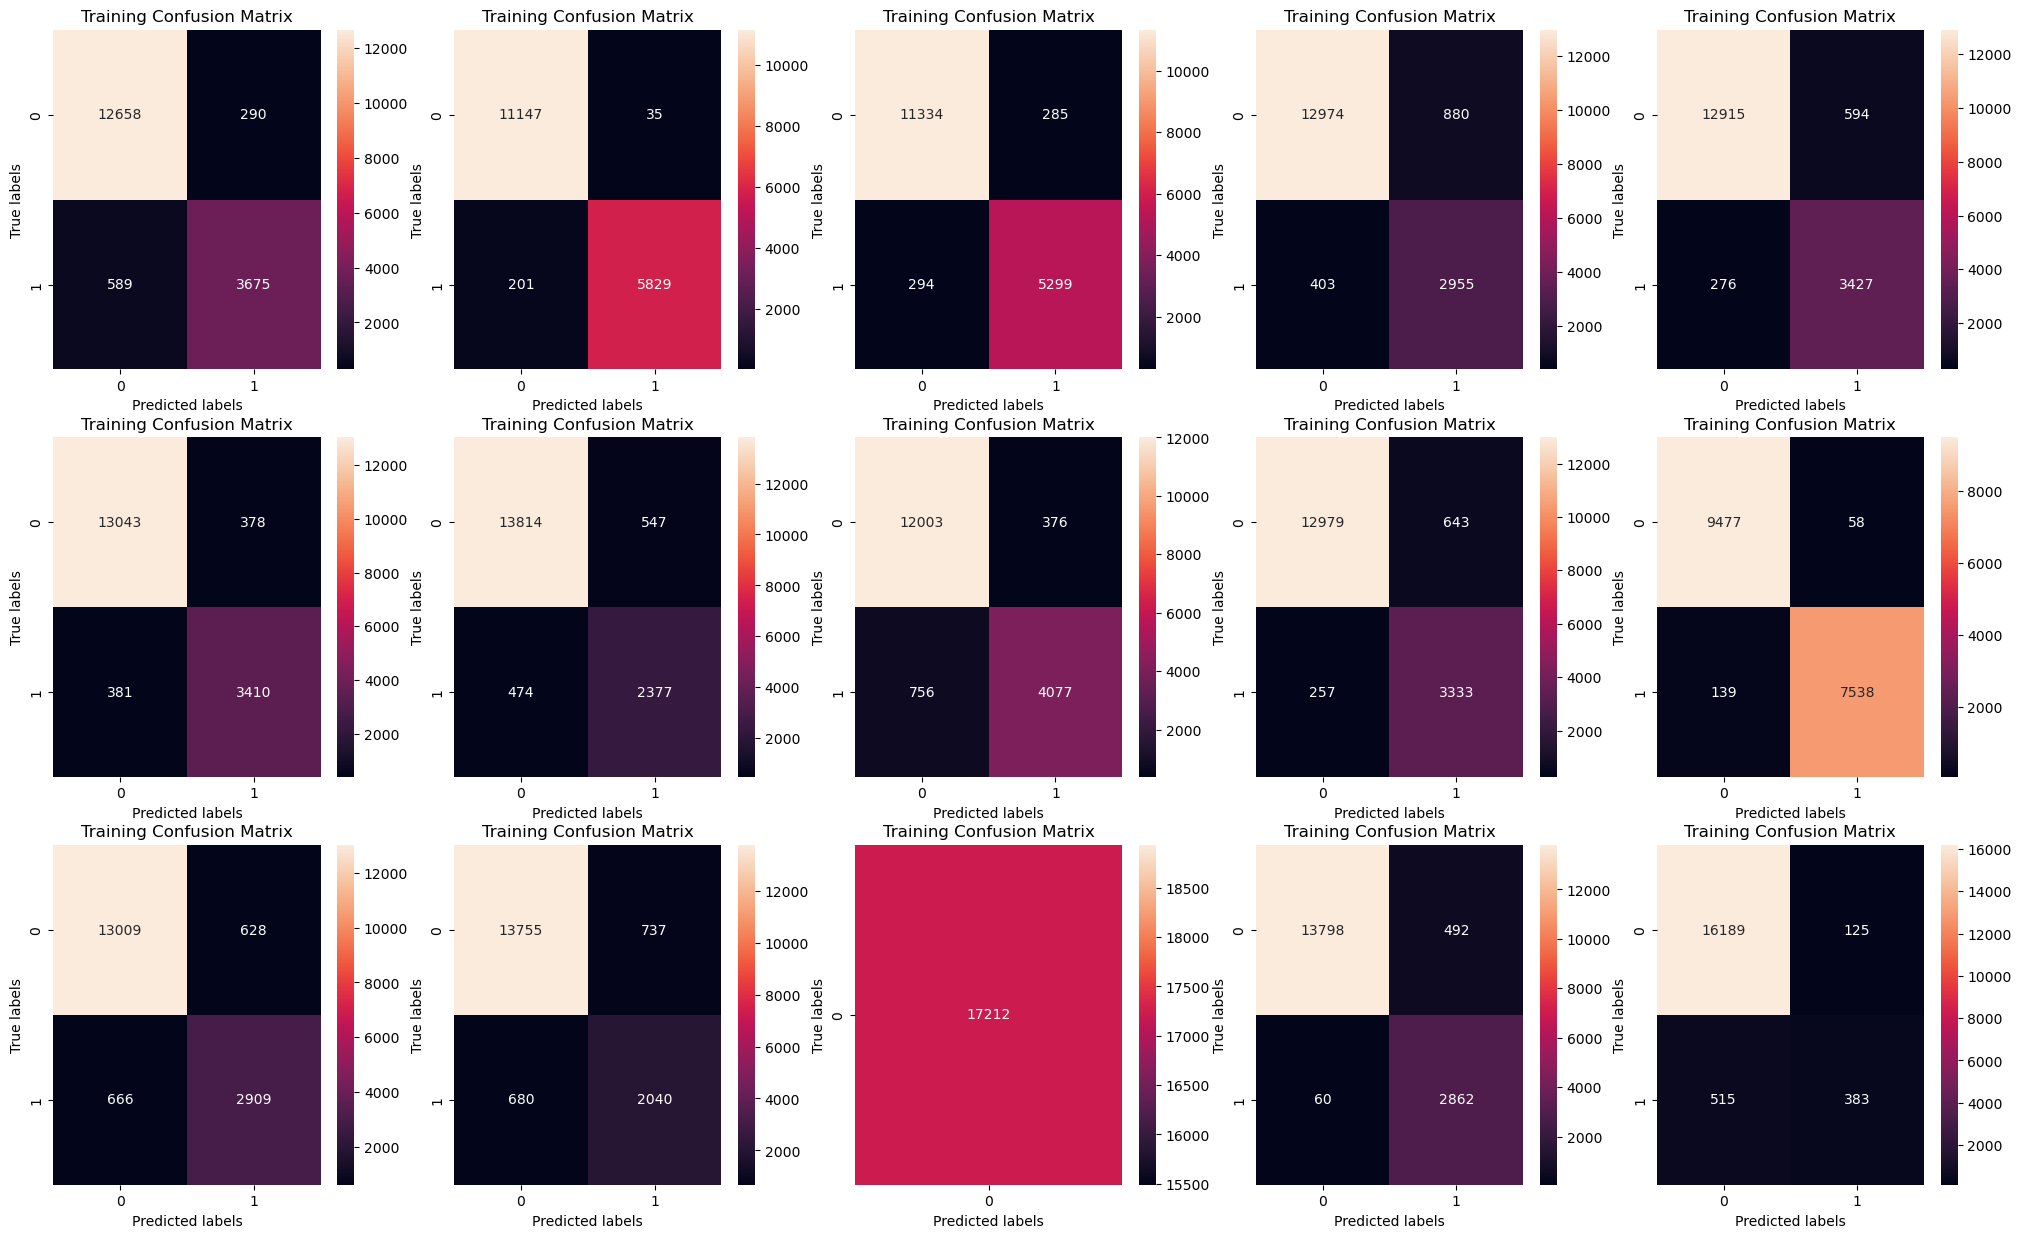

In [154]:
#Confusion matrix for training data 
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
    
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title('Training Confusion Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\ahamr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


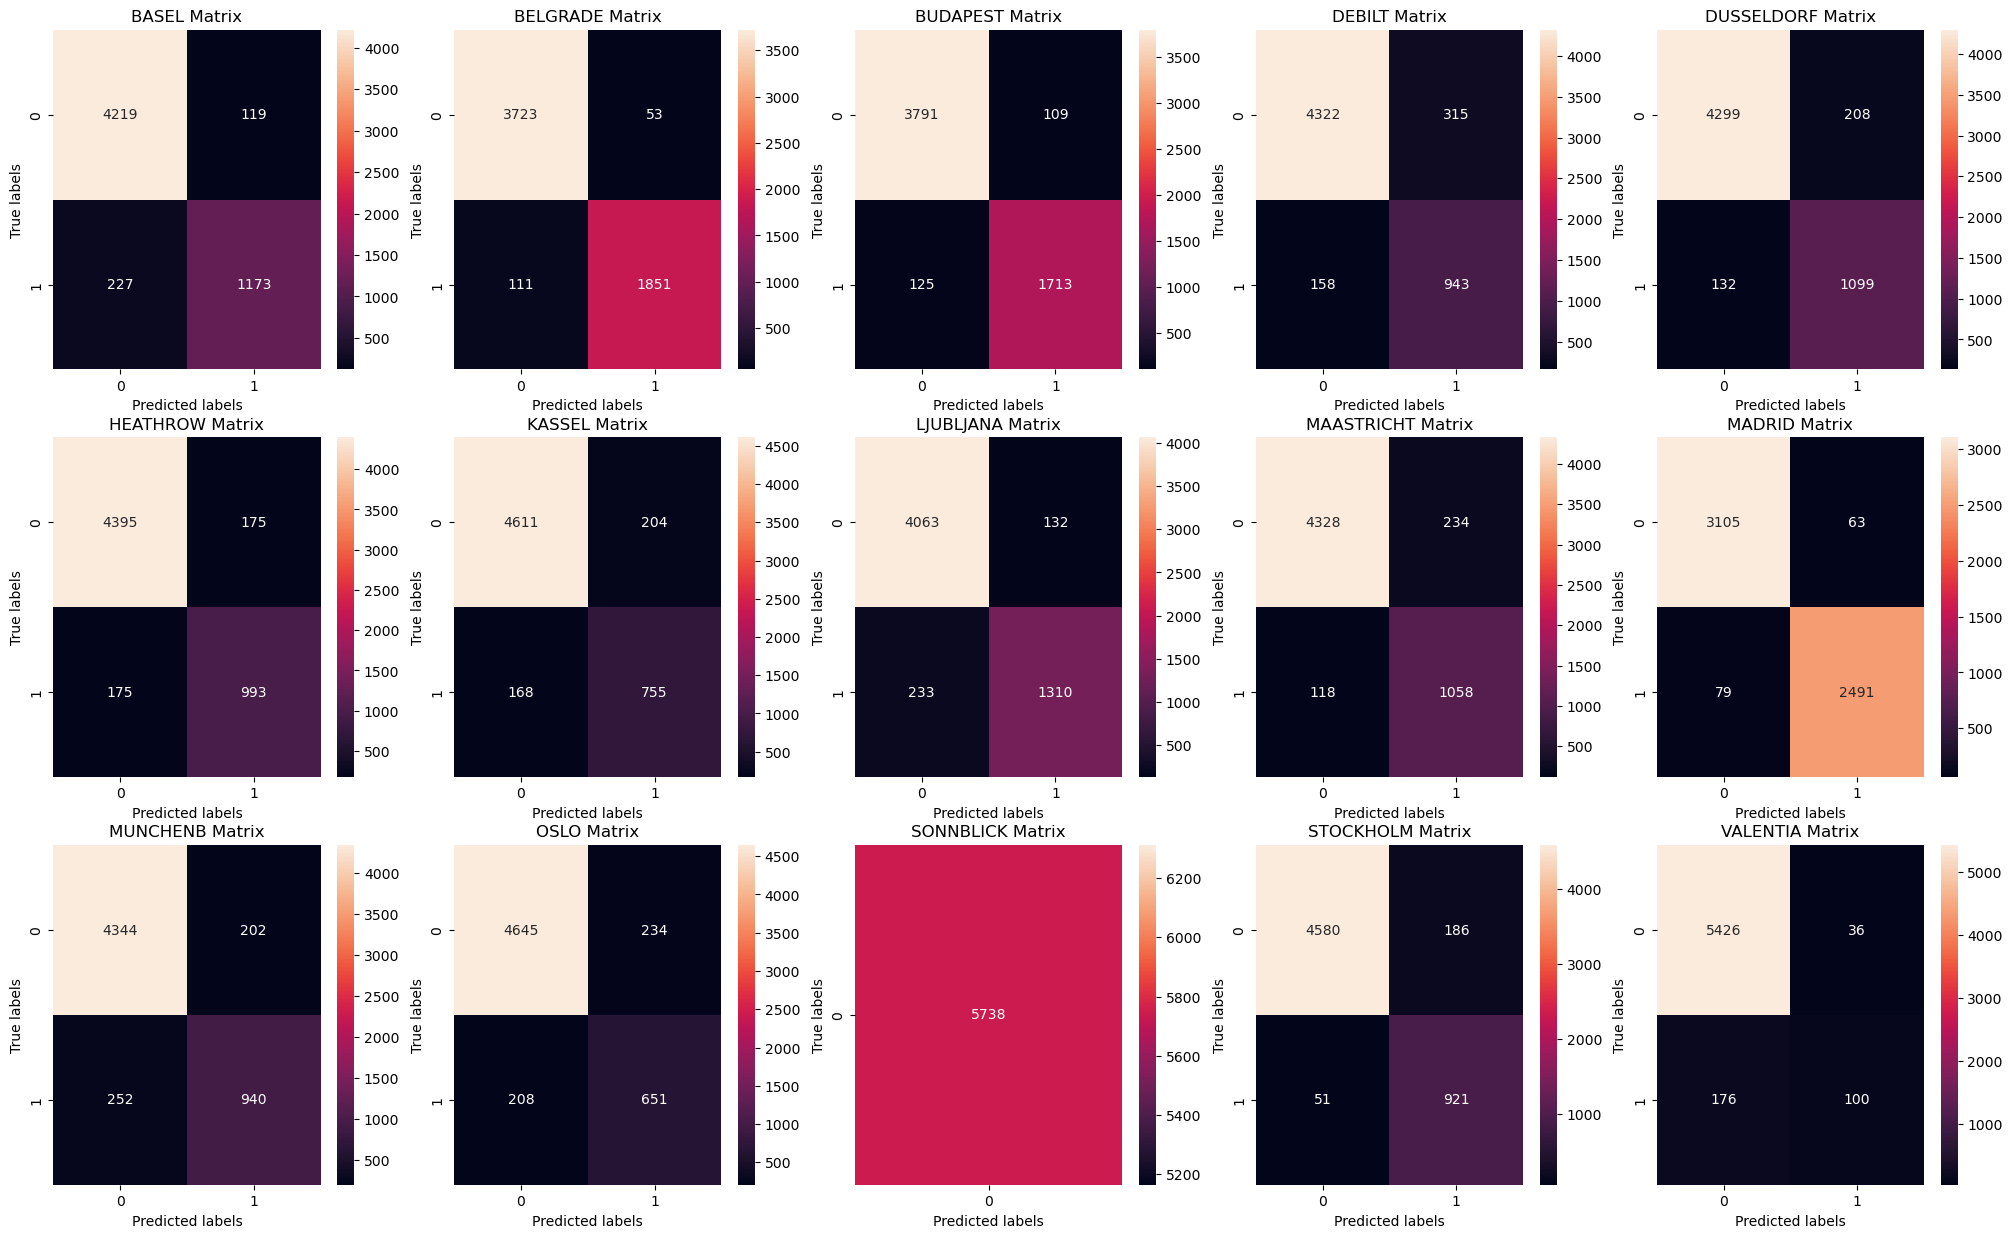

In [155]:
#Confusion matrix for testing data
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); 
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1